<a href="https://colab.research.google.com/github/Clarke-Jools-36/DataAnalysis22/blob/main/CA2_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Data Analysis 2021 - Coursework 2 (45%)
# Analysing gravitational wave signals 
## Deadline Friday week 11, 2pm.

#### <div class = "tip">Instructions</div>

This coursework assesses learning outcomes from **all Chapters** of the course, but in particular **Chapters 6, 7, 8 and 9**. It is worth 45% of the module. Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework. 

**These assessments are equivalent to an exam**:
- Submit your work via Turn-It-In on Learning Central. Note that you will need to upload your final notebook exported as a pdf file. **Don't forget to click `run all` before you export it**. You can constantly update the Turnitin submission until the deadline.
- The breakdown of the assessment criteria is provided below.
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbook.

#### <div class = "tip">Tips</div>


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.
- You may need to do some additional research into this subject. You may find it useful to look at the following publication from the LIGO consortium. https://arxiv.org/pdf/1608.01940.pdf

***

Gravitational waves are disturbances in the curvature of spacetime, generated by accelerated masses, that propagate as waves outward from their source at the speed of light.  They are predicted in General Relativity and other theories of gravity and since 2017, they have now been observed!

In this exercise we will analyse some mock gravitational wave data from two unknown astrophysical objects merging together and coelescing. We will use a Monte Carlo Markov Chain (MCMC) to compare a scaled model that predicts how the wave changes depending on the total mass of the merging objects and their distance from us to the observed waveform.  This will allow us to determine the nature of the orbiting objects that merged to form the gravitational wave using MCMC, whether for instance they could be originating from merging white dwarfs, neutron stars or black holes.

The mock or simulated waveforms measure the strain as two compact, dense astrophysical objects coalesce. The strain describes the amplitude of the wave. The system is parameterised by the masses of the merging objects, $M_1$ and $M_2$, and their distance from the observer $D$.  

Other useful parameters and equations relevant for this assessment are given in the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb).

***

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from scipy import stats
import numpy as np

## Part A - Some background 

1. How do astronomers know that the gravitational waves from the GW150914 event were due to two black holes merging? <div align="right">**[2 marks]**</div><br>

*The signal was identified as a binary black hole merger by matching up with simulated data from einstein theory.*

2. Describe the different parts of the waveform produced due to gravitational waves from a merging black hole event.   <div align="right">**[3 marks]**</div><br>
 


3. The file ``gravitationalwaveevents.csv`` contains the properties of previously observed gravitational waves. Ultimately, we will aim to compare your merger event results with the properties from previously observed gravitational waves. Parameters obtained for these systems are known as posteriors as they are derived using Bayes Theorem (ie posterior = likelihood $\times$ prior). The errors in these values are the credible intervals from the posterior distribution derived for each parameter. Plot the **total** mass of the merging sources against their distance.   The units are $M_{\odot}$ and Mpc for mass and distance respectively. <div align="right">**[10 marks]** </div>

Download the file to my colab instance (that I have hosted on my Github, because you can't wget from LC as its behind sign in) 

In [2]:
!wget https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/gravitationalwaveevents.csv

--2022-12-05 12:05:43--  https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/gravitationalwaveevents.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1857 (1.8K) [text/plain]
Saving to: ‘gravitationalwaveevents.csv.2’

gravitationalwaveev 100%[===================>]   1.81K  --.-KB/s    in 0s      

2022-12-05 12:05:43 (34.7 MB/s) - ‘gravitationalwaveevents.csv.2’ saved [1857/1857]



Then i'm going to import the file and check some things about it, so the lenght of the data, the head, which is the first N values and all the headers

In [3]:
dataIn=pd.read_csv('/content/gravitationalwaveevents.csv')
print(f"#### length of data: {len(dataIn)}\n\n")
dataIn.head(8)

#### length of data: 42




,Unnamed: 0,idx,DL,DL_err,Mtot,Mtot_err,Mchirp,Mchirp_err
0,0,0,430.0,170.0,63.1,3.0,28.6,1.5
1,1,1,1060.0,480.0,35.7,3.8,15.2,1.1
2,2,2,440.0,190.0,20.5,1.5,8.9,0.3
3,3,3,960.0,410.0,49.1,3.9,21.5,1.7
4,4,4,320.0,110.0,17.8,0.7,7.9,0.2
5,5,5,2750.0,1320.0,80.3,10.2,35.7,4.7
6,6,6,990.0,380.0,56.4,3.7,25.0,1.6
7,7,7,580.0,210.0,53.4,2.4,24.2,1.1


Text(0.5, 0, 'Distance / Mpc')

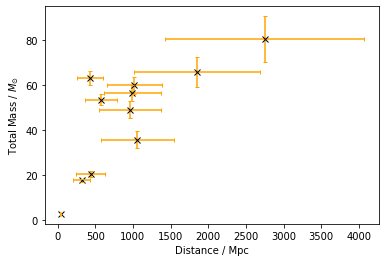

In [4]:
plt.plot(dataIn["DL"],dataIn["Mtot"],  "kx")
plt.errorbar(dataIn["DL"], dataIn["Mtot"],
             yerr=dataIn["Mtot_err"], xerr=dataIn["DL_err"], 
             fmt="none", 
             ecolor="orange", 
             capsize=2)

plt.ylabel("Total Mass / $M_{\odot}$")
plt.xlabel("Distance / Mpc")

The plot shows there is a positive correlation between the size of the error and the distance

***

## Part B - The data

Now it is your turn to look at observations of a gravitational wave event. 

1. Read in the datafile of the observed waveform `Observedwaveform.csv`. These files store the strain as a function of "GPS time" for the merger of two bodies. <div align="right">**[5 marks]**</div><br>

Lets download the next file from my github

In [5]:
!wget https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/Observedwaveform.csv

--2022-12-05 12:05:44--  https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/Observedwaveform.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26465 (26K) [text/plain]
Saving to: ‘Observedwaveform.csv.2’

Observedwaveform.cs 100%[===================>]  25.84K  --.-KB/s    in 0.001s  

2022-12-05 12:05:44 (18.3 MB/s) - ‘Observedwaveform.csv.2’ saved [26465/26465]



and check out the head again

In [6]:
dataIn=pd.read_csv('/content/Observedwaveform.csv')
print(f"#### length of data: {len(dataIn)}\n\n")
dataIn.head(8)

#### length of data: 636




,strain,time (s)
0,8.101405e-23,1.205952e+09
1,1.019082e-22,1.205952e+09
2,1.226521e-22,1.205952e+09
3,1.396412e-22,1.205952e+09
4,1.522380e-22,1.205952e+09
5,1.633110e-22,1.205952e+09
6,1.775375e-22,1.205952e+09
7,1.983757e-22,1.205952e+09


Text(0, 0.5, 'Strain / unitless')

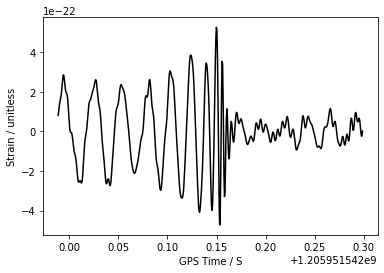

In [7]:
s = dataIn["strain"]
t_gps = dataIn["time (s)"]

plt.plot(t_gps,s,"k")
plt.xlabel("GPS Time / S")
plt.ylabel("Strain / unitless")

2. The GPS time of the merger for your waveform is 1205951542.153363.  Your data will need to be shifted so that the merger occurs at time = 0 secs.  This is required as we will compare our data with a which have the merger at t=0s.  <div align="right">**[4 marks]**</div><br>


Text(0, 0.5, 'Strain / unitless')

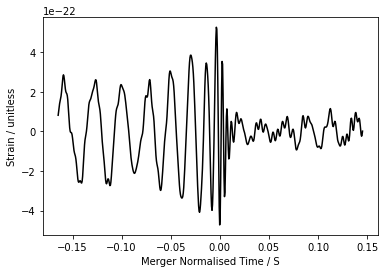

In [8]:
t = t_gps - 1205951542.153363

plt.plot(t,s,"k")
plt.xlabel("Merger Normalised Time / S")
plt.ylabel("Strain / unitless")

3. We need to estimate the average noise and its standard deviation in our data. This requires careful thought about where the noise can be seen in the waveform.   <div align="right">**[6 marks]**</div>

Text(0, 0.5, 'Strain / unitless')

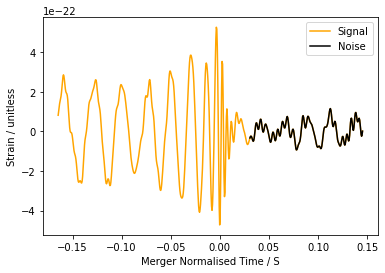

In [9]:
plt.plot(t,s,"orange", label = "Signal")

purge = 400

plt.plot(t[purge:],s[purge:],"k", label = "Noise")

plt.legend()

plt.xlabel("Merger Normalised Time / S")
plt.ylabel("Strain / unitless")

In [10]:
noise = s[purge:]

mean = noise.mean()
std = noise.std()

print(f"Noise has mean {mean:.4e} and standard deviation {std:.4e}")

Noise has mean 2.1502e-24 and standard deviation 4.8026e-23


Text(0.5, 0, 'Strain / unitless')

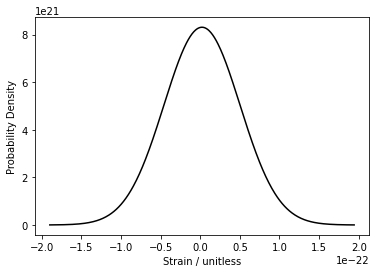

In [11]:
x = np.linspace(mean-(4*std), mean+(4*std), 500)
plt.plot(x ,stats.norm.pdf(x, mean, std), "k")

plt.ylabel("Probability Density")
plt.xlabel("Strain / unitless")

***

## Part C - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") 

In this part of the question we will attempt to produce a waveform for any mass and distance values using a reference waveform with $M=40 M_{sun}$, $D=1$Mpc and $q=M_2/M_1 = 1$ and scaling it by any new mass and/or distance.    

The reference waveform/template we will use is```reference_Mtot40Msun_Dist1Mpc.csv```. 

You will need to follow the steps below when answering this question:

1. Open the reference/template file using the `pandas` package. Write a function in python to scale the time and strain of any waveform with $q=1$, total mass $M$ and distance $D$ from the reference waveform file ```reference_Mtot40Msun_Dist1Mpc.csv``` using the equations for how the waveform strain and time depends on mass and distance from [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb). <div align="right"> **[10 marks]**</div><br>

**Answer:**

In [12]:
!wget https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/reference_Mtot40Msun_Dist1Mpc.csv

--2022-12-05 12:05:45--  https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/reference_Mtot40Msun_Dist1Mpc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 997473 (974K) [text/plain]
Saving to: ‘reference_Mtot40Msun_Dist1Mpc.csv.2’

reference_Mtot40Msu 100%[===================>] 974.09K  --.-KB/s    in 0.05s   

2022-12-05 12:05:45 (20.1 MB/s) - ‘reference_Mtot40Msun_Dist1Mpc.csv.2’ saved [997473/997473]



In [13]:
refIn=pd.read_csv('reference_Mtot40Msun_Dist1Mpc.csv')
print(f"#### length of data: {len(refIn)}\n\n")
refIn.head(8)

#### length of data: 24622




,strain,time (s)
0,-6.162294e-20,-11.946102
1,-6.140841e-20,-11.945614
2,-6.113607e-20,-11.945126
3,-6.080617e-20,-11.944637
4,-6.041902e-20,-11.944149
5,-5.997498e-20,-11.943661
6,-5.947447e-20,-11.943172
7,-5.891795e-20,-11.942684


there are a lot more datapoints in this reference than the other array so this graph is going to be more crowded

Text(0, 0.5, 'Strain / unitless')

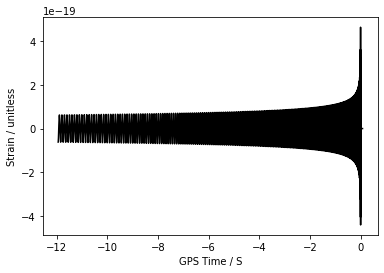

In [14]:
s = refIn["strain"]
t_gps = refIn["time (s)"]

plt.plot(t_gps,s,"k")
plt.xlabel("GPS Time / S")
plt.ylabel("Strain / unitless")

We can see that it has no noise if we zoom in and check after t=0

(-2e-19, 2e-19)

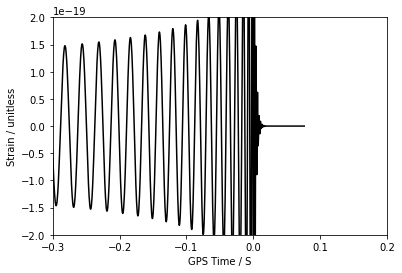

In [15]:
plt.plot(t_gps,s,"k")
plt.xlabel("GPS Time / S")
plt.ylabel("Strain / unitless")

plt.xlim(-0.3,0.2)
plt.ylim(-2e-19,2e-19)

yes definitely no noise. This reference waveform has $𝑀^\prime=40𝑀_{𝑠𝑢𝑛}$ , $𝐷^\prime=1Mpc$ and $𝑞=\frac{𝑀2}{𝑀1}=1$. 

Mathematically, we have an equal-mass system ($q=1$), if we want to create a waveform with total mass $M=M_1 + M_2$ at a distance $D=1Mpc$ (not spinning), then we can scale the strain $h(t,M,D)$ from a reference waveform with $M^\prime,D^\prime$ as:

$$
h(t,M,D) = \left(\dfrac{M}{M^\prime}\right) \left(\dfrac{D^\prime}{D}\right) ~ h(t^\prime) 
$$

where: 

$$ t^\prime=\left(\dfrac{M^\prime}{M}\right)t  $$

and $t=0$ is defined as being the time at which the merger occurred.

In [16]:
def scale_ref(M,D): #M_sun, Mpc
  M_prime, D_prime = 40, 1 #M_sun, Mpc
  out = (M/M_prime)*(D_prime/D)*np.array(refIn["strain"])
  return out

If I test the function with the same M and D as the reference, then I should get exactly the same result

Text(0, 0.5, 'Strain / unitless')

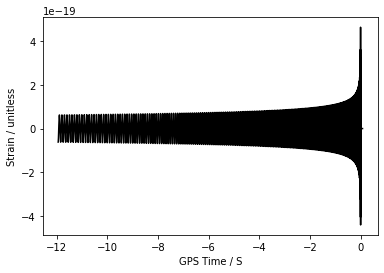

In [17]:
plt.plot(refIn["time (s)"],scale_ref(40,1),"k")
plt.xlabel("GPS Time / S")
plt.ylabel("Strain / unitless")

This looks about the same but lets take the difference and be sure. 

In [18]:
np.mean((refIn["strain"] - scale_ref(40,1))**2)

0.0

Sum of squares is zero, so the two are identical, I can expect the function is working properly. 

(-2e-19, 2e-19)

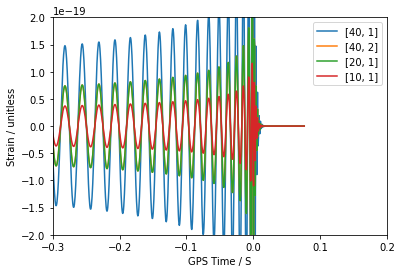

In [19]:
md_ = [[40,1],[40,2],[20,1],[10,1]]

for i in md_:
  plt.plot(refIn["time (s)"],scale_ref(*i), label = i)



plt.legend()
plt.xlabel("GPS Time / S")
plt.ylabel("Strain / unitless")
plt.xlim(-0.3,0.2)
plt.ylim(-2e-19,2e-19)

Looks good, [40,2] seems to be the same as another line that comes after it. 

2. Test your function works by substituting in $M=70\,M_{sun}$ and $D=5$Mpc, and compare your resulting waveform with the template in `reference_Mtot70Msun_Dist5Mpc.csv`.  Comment on your result. <div align="right">**[7 marks]**</div><br>
 


In [20]:
!wget https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/mockData_Mtot70Msun_Dist5Mpc.csv

--2022-12-05 12:05:46--  https://raw.githubusercontent.com/Clarke-Jools-36/DataAnalysis22/main/mockData_Mtot70Msun_Dist5Mpc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18783 (18K) [text/plain]
Saving to: ‘mockData_Mtot70Msun_Dist5Mpc.csv.1’

mockData_Mtot70Msun 100%[===================>]  18.34K  --.-KB/s    in 0.001s  

2022-12-05 12:05:47 (21.9 MB/s) - ‘mockData_Mtot70Msun_Dist5Mpc.csv.1’ saved [18783/18783]



In [21]:
mockIn=pd.read_csv('mockData_Mtot70Msun_Dist5Mpc.csv')
print(f"#### length of data: {len(mockIn)}\n\n")
mockIn.head(8)

#### length of data: 440




,strain,time (s)
0,-1.934524e-20,-0.164658
1,-4.436423e-20,-0.164170
2,-4.776572e-20,-0.163681
3,-4.637995e-20,-0.163193
4,-6.529435e-20,-0.162704
5,-6.439479e-20,-0.162216
6,-6.364858e-20,-0.161728
7,-6.772127e-20,-0.161240


we can see there is a lot less data than reference, so we will need to change the x limits of the graph in order to see the data

(-0.1746575927734375, 0.0596976375579834)

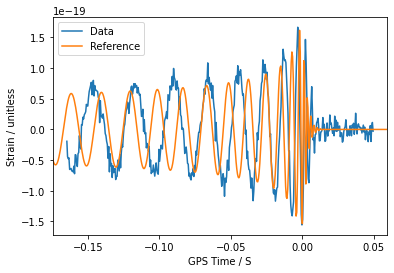

In [32]:
plt.plot(mockIn["time (s)"],mockIn["strain"], label="Data")
plt.plot(refIn["time (s)"],scale_ref(70,5), label="Reference")



plt.legend()
plt.xlabel("GPS Time / S")
plt.ylabel("Strain / unitless")
plt.xlim(min(mockIn["time (s)"])-0.01,max(mockIn["time (s)"])+0.01) #set the limits to the data

3. Use your function to scale the template waveform ($M=40 M_{sun}$, $D=1$Mpc) to make an initial rough estimate "by eye" of the total mass and distance that "best" fits your data (e.g. to within +/- 5 Msun, +/- 100 Mpc). <div align="right">**[8 marks]**</div>

***

## Part D - Get data and model to have the same x values. 

Now that we have our observed data, and can scale the template data to any mass and distance, we need to do one more fix.  Currently our data and our templates have different sampling on the $x$ axis - ie they have different values of $x$ (time(.  We need to try and match the $x$ times up so that for each value of $x$ we can compare the $y$ values (the observed strain with the strain from the scaled template).  

We need to only consider the times when we have observed data, so we will trim our data set.

1.  Our data waveform starts at some time $t_{\rm min}$. Find out what this is.  Next, take your observed data waveform and output data for $t$ > $t_{\rm min}$ and $t$ < $0$ (ie only keep information for times $\le 0$ (before the merger), or for times where there is data).  Verify, by plotting, that your new observed waveform only has data in this restricted time range. <div align="right">**[5 marks]**</div><br>

2. We now need to put both observed and template waveforms on the same time sampling, ie the same number of data points.  The model waveforms have approx 20,000+ time steps, yet the data has less than hundreds in the time range specified!  

We need to interpolate between our observed data and the template. To do this use the following code:

(assuming `x[index]` and `y[index]` are the observed data from Part D.1 and scaled template time is your scaled reference template to your suggested values of $M$ and $D$ from Part C3.)

```
from scipy.interpolate import interp1d

# get interpolation object using data
interp_fn =interp1d(x[index],y[index],bounds_error=False)

# now get scaled template and get the strains for the same x axis as data
interp_strain = interp_fn(scaled_template_time)

#plot
plt.plot(scaled_template_time,interp_strain)
```

Briefly verify that this works. <div align="right">**[5 marks]**</div>

*Hints:*
 * *One can use the following code example  `index = np.where((data > 5)&(data < 10))[0]`. This type of statement returns a list of indices (`index`) where the conditions in the bracket have been met.  `data_[index]` pulls out `data` that satisfy the conditions in the brackets above.*

**Answer**

*Your answer here*

***

## Part E - Estimating the best fit total mass using MCMC 

Now that we know how to make the scaled template (ie 40Msun,1Mpc template file) and the observed data have the same time sampling, we can use MCMC to find out the total mass of the system that made the data we see.  

You can assume the "by-eye" estimate of the distance above.

Think carefully about what the likelihood function will be in this case (see Chapters 6-9).  

1. Use MCMC to sample the total mass, $M$, to produce a best-fit value for your data.  <div align="right">**[20 marks]**</div> <br>

2.  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC. <div align="right">**[15 marks]**</div> <br>

3. Report the median and 90% credible limits on your value of $M$.  <div align="right">**[10 marks]**</div> <br>
 
You may assume that:
- the noise is described by a Gaussian distribution, 
- the total mass of the system is in the range [20,100] $M_{sun}$.
 
_Hints:_

 * _Think very carefully about the form of your likelihood since here we are comparing observed data with a model_
 
 * _You should work with "log(Likelihood)" to avoid numerical errors  - note this will affect both your posterior and the step in the MCMC chain where we usually write $p_{\rm proposed}/p_{\rm current}$_

 * _The step size between samples of the MCMC is quite important. A suggested value is $0.1\,M_{sun}$_
 
 * _The initial guess of your mass is also very important. You may find yourself getting into a local minimum rather than your code finding the true minimum._
 
 * _Test your MCMC on a small number of samples (e.g. 10-100) before trying it with a larger number (e.g. $10^5$ or $10^6$)_
 
 * _At the end, ask yourself if you need to include every sample?_
 
 * _Depending on your step size, this part can take a long time to run. Suggest that you move all your plotting routines to a different code cell to save you re-running everything 10000s of times when you just want to change a plot command._
 
 * _To find out how long it will take for a Jupyter notebook to compile the MCMC code cell, add the following snippet to your code before you go into your MCMC loop (where Nsteps is the number of steps your MCMC is using):_
 
```def time_spent_waiting(n):
    from datetime import datetime,timedelta
    preddur=[n*0.01,n*0.02]
    print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
    return```

**Answer:**

*Your answer here*



***

## Part F - Estimating mass *and distance* using MCMC for the merging system 

If you run into any difficulties completing this component of the coursework, you can still attempt Part G using either your by-eye estimates for $M$ and $D$ from Part C, or your $M$ from the MCMC from Part E and your by eye estimate for $D$ in Part C.

1. Repeat your MCMC analysis to now estimate the total mass, $𝑀$, *and* the distance, $𝐷$ at the same time.   <div align="right">**[15 marks]**</div><br>

2.  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC. <div align="right">**[10 marks]**</div><br>

3.  Report the median and 90% credible limits on your value of $M$ and compare your best fit waveform with the data. Comment on your result.  <div align="right">**[15 marks]**</div>
 

_Hints:_
 * *Now your theta_current for the MCMC will have 2 values (Mtot and D) as such you will need to specify 2 initial parameters for theta_current. Whereas before you may have used something like `theta_current.append([Mtot_guess])`, now you will need something like `theta_current.append(np.array([Mtot_guess,D_guess]))` and similarly your `D_theta` will need to have 2 values to tell the MCMC to take a random step in both Mtot and D values in each step of the MCMC.*
 * *Be careful not to get caught up in messy arrays - if in doubt run the MCMC for 5-10 steps and print out the theta_current to check everything ends up looking like it should.*

**Answer:**

*Your answer here*

***

## Part G - Putting it all together 

If you run into any difficulties completing Parts E and F, you can still attempt this part using your by-eye estimates for $M$ and $D$ from Part C.

1. Calculate the chirp mass for your system and the individual masses of your merging bodies. Comment on your individual masses. <div align="right">**[4 marks]**</div><br>

2. Plot your MCMC derived properties alongside the previously discovered gravitational wave systems. <div align="right">**[5 marks]**</div><br>
 
3. Estimate the period from your observed waveform around the peak amplitude of the wave. <div align="right">**[8 marks]**</div><br>

4. Assuming that the objects are not spinning, and that their orbits are Keplerian and essentially circular, use your period to estimate the orbital separation in **km** of the two bodies around peak amplitude. Think carefully about how the orbital period is related to the period of your gravitational wave.    <div align="right">**[10 marks]**</div><br>

5. Comment on what your analysis suggests are the best astrophysical candidates for the merging objects? <div align="right">**[3 marks]**</div>

**Answer:**

*Your answer here*



***

## Part H - Understanding, Presentation and Interpretation

An additional 20 marks will be awarded for evidence of understanding and knowledge via (for example) explanations, plots, comments on your results and well formatted and well explained results. Marks are also available for additional investigations carried out on your analysis above. These marks are available for those data analysis reports that show evidence of work that is *very high quality* or *outstanding* as per the decile descriptions in the Assessment Criteria for modules. <div align="right">**[20 marks]**</div>